In [1]:

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import keras_tuner as kt
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import keras_tuner as kt

TM_MODE = 0
TE_MODE = 1
batch_size = 512

norm_layer = keras.layers.Normalization(dtype='float32', axis=-1, mean=[200e-9, 200e-9, 200e-9, 200e-9, 2.3, 1.55e-6], variance=[76800e-18, 76800e-18, 76800e-18, 76800e-18, 0.1633, 3.3333e-15])

policy = keras.mixed_precision.Policy('mixed_float16')
keras.mixed_precision.set_global_policy(policy)
print("Set Keras Policy")


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
Set Keras Policy


In [2]:
# For Dataset 1

In [3]:
training_data_file_paths = [
    "ANT1SWG_production_data_nov_26_22.dat",
    "ANT1SWG_production_data_nov_27_22_joshmachine.dat",
    "ANT1SWG_production_data_dec_3_22_3000_2.dat",
    "ANT1SWG_production_data_dec_4_22_3000_1.dat",
    "ANT1SWG_production_data_dec_4_22_3000_2.dat",
    "DatagenANT1SWG_pList_dec_9_22_longLvalues_2_data.dat",
    "DatagenANT1SWG_pList_dec_9_22_longLvalues_data.dat",
]


testing_data_file_paths = [
    "Testing/ANT1SWG_production_data_dec_3_22_3000_1.dat",
    "Testing/ANT1SWG_production_data_nov_28_22_joshmachine.dat",
]

In [4]:
training_data_file_paths

['ANT1SWG_production_data_nov_26_22.dat',
 'ANT1SWG_production_data_nov_27_22_joshmachine.dat',
 'ANT1SWG_production_data_dec_3_22_3000_2.dat',
 'ANT1SWG_production_data_dec_4_22_3000_1.dat',
 'ANT1SWG_production_data_dec_4_22_3000_2.dat',
 'DatagenANT1SWG_pList_dec_9_22_longLvalues_2_data.dat',
 'DatagenANT1SWG_pList_dec_9_22_longLvalues_data.dat']

In [5]:
testing_data_file_paths

['Testing/ANT1SWG_production_data_dec_3_22_3000_1.dat',
 'Testing/ANT1SWG_production_data_nov_28_22_joshmachine.dat']

In [6]:
data1 = pd.read_csv('ANT1SWG_production_data_nov_26_22.dat', delimiter='\t')
random_samples_1 = data1.sample(n=1759, random_state=42)  
random_samples_1.to_csv('random_samples_1.dat', sep='\t', index=False)
data1 = np.loadtxt('random_samples_1.dat')
print(data1.shape)


data2 = pd.read_csv('ANT1SWG_production_data_nov_27_22_joshmachine.dat', delimiter='\t')
random_samples_2 = data2.sample(n=444, random_state=42)  
random_samples_2.to_csv('random_samples_2.dat', sep='\t', index=False)
data2 = np.loadtxt('random_samples_2.dat')
print(data2.shape)

data3 = pd.read_csv('ANT1SWG_production_data_dec_3_22_3000_2.dat', delimiter='\t')
random_samples_3 = data3.sample(n=1318, random_state=42)  
random_samples_3.to_csv('random_samples_3.dat', sep='\t', index=False)
data3 = np.loadtxt('random_samples_3.dat')
print(data3.shape)

data4 = pd.read_csv('ANT1SWG_production_data_dec_4_22_3000_1.dat', delimiter='\t')
random_samples_4 = data4.sample(n=1318, random_state=42)  
random_samples_4.to_csv('random_samples_4.dat', sep='\t', index=False)
data4 = np.loadtxt('random_samples_4.dat')
print(data4.shape)

data5 = pd.read_csv('ANT1SWG_production_data_dec_4_22_3000_2.dat', delimiter='\t')
random_samples_5 = data5.sample(n=1318, random_state=42)  
random_samples_5.to_csv('random_samples_5.dat', sep='\t', index=False)
data5 = np.loadtxt('random_samples_5.dat')
print(data5.shape)

data6 = pd.read_csv('DatagenANT1SWG_pList_dec_9_22_longLvalues_2_data.dat', delimiter='\t')
random_samples_6 = data6.sample(n=1318, random_state=42)  
random_samples_6.to_csv('random_samples_6.dat', sep='\t', index=False)
data6 = np.loadtxt('random_samples_6.dat')
print(data6.shape)

data7 = pd.read_csv('DatagenANT1SWG_pList_dec_9_22_longLvalues_data.dat', delimiter='\t')
random_samples_7 = data7.sample(n=1318, random_state=42)  
random_samples_7.to_csv('random_samples_7.dat', sep='\t', index=False)
data7 = np.loadtxt('random_samples_7.dat')
print(data7.shape)

#Testing

data8 = pd.read_csv('Testing/ANT1SWG_production_data_dec_3_22_3000_1.dat', delimiter='\t')
random_samples_8 = data8.sample(n=1651, random_state=42)  
random_samples_8.to_csv('random_samples_8.dat', sep='\t', index=False)
data8 = np.loadtxt('random_samples_8.dat')
print(data8.shape)

data9 = pd.read_csv('Testing/ANT1SWG_production_data_nov_28_22_joshmachine.dat', delimiter='\t')
random_samples_9 = data9.sample(n=547, random_state=42)  
random_samples_9.to_csv('random_samples_9.dat', sep='\t', index=False)
data9 = np.loadtxt('random_samples_9.dat')
print(data9.shape)





(1760, 409)
(445, 409)
(1319, 409)
(1319, 409)
(1319, 409)
(1319, 409)
(1319, 409)
(1652, 409)
(548, 409)


In [7]:
#For dataset 2

In [8]:
from sklearn.model_selection import train_test_split

data = np.loadtxt('2D_3seg_jun_27_output.dat')
print(data.shape)

import seaborn as sns
import matplotlib.pyplot as plt

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_file_path = 'train_data.dat'
test_file_path = 'test_data.dat'

# Save training and testing data to .dat files
np.savetxt(train_file_path, train_data)
np.savetxt(test_file_path, test_data)

training_data_file_paths = [train_file_path]
testing_data_file_paths = [test_file_path]

print("Training data saved to:", train_file_path)
print("Testing data saved to:", test_file_path)
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

(11000, 409)
Training data saved to: train_data.dat
Testing data saved to: test_data.dat
Training data shape: (8800, 409)
Testing data shape: (2200, 409)


In [9]:
# For dataset 3


# In[8]:


from sklearn.model_selection import train_test_split

data_1 = np.loadtxt('structure_3.dat')
print(data_1.shape)

import seaborn as sns
import matplotlib.pyplot as plt

train_data_1, test_data_1 = train_test_split(data_1, test_size=0.2, random_state=42)

train_file_path_1 = 'train_data_1.dat'
test_file_path_1 = 'test_data_1.dat'

# Save training and testing data to .dat files
np.savetxt(train_file_path_1, train_data_1)
np.savetxt(test_file_path_1, test_data_1)

training_data_file_paths_1 = [train_file_path_1]
testing_data_file_paths_1 = [test_file_path_1]

print("Training data saved to:", train_file_path_1)
print("Testing data saved to:", test_file_path_1)
print("Training data shape:", train_data_1.shape)
print("Testing data shape:", test_data_1.shape)

(11000, 409)
Training data saved to: train_data_1.dat
Testing data saved to: test_data_1.dat
Training data shape: (8800, 409)
Testing data shape: (2200, 409)


In [10]:

training_data_file_paths = [
    "random_samples_1.dat",
    "random_samples_2.dat",
    "random_samples_3.dat",
    "random_samples_4.dat",
    "random_samples_5.dat",
    "random_samples_6.dat",
    "random_samples_7.dat",
    "train_data.dat",
    "train_data_1.dat"]
testing_data_file_paths = [
    "random_samples_8.dat",
    "random_samples_9.dat",
    "test_data.dat", 
    "test_data_1.dat"]


In [11]:
training_data_file_paths

['random_samples_1.dat',
 'random_samples_2.dat',
 'random_samples_3.dat',
 'random_samples_4.dat',
 'random_samples_5.dat',
 'random_samples_6.dat',
 'random_samples_7.dat',
 'train_data.dat',
 'train_data_1.dat']

In [12]:
testing_data_file_paths

['random_samples_8.dat',
 'random_samples_9.dat',
 'test_data.dat',
 'test_data_1.dat']

In [13]:
wavelengths = np.loadtxt("wavelengths.dat", delimiter=',')

In [14]:
def seperate_out_by_wavelength(linked_data):
    for_output_features = []
    for_output_labels = []
    for data in linked_data:
        for tlabel, tuplabel, tdownlabel, rlabel, wavelength in zip(data[0], data[1], data[2], data[3], wavelengths):
            feature = [*data[4], wavelength]
            for_output_features.append(feature)
            for_output_labels.append([tlabel, tuplabel, tdownlabel, rlabel])
    return (np.array(for_output_features), np.array(for_output_labels))

In [15]:
def load_data_into_arrays(file_paths, shuffle=False):
    #Link labels and features to shuffle, avoiding having same geometric parameters in training and testing data
    temp_combined = []

    for file_path in file_paths:
        file = np.loadtxt(file_path)
        T_matrix = file[:,0:100]
        Tup_matrix = file[:,100:200]
        Tdown_matrix = np.abs(file[:,200:300])
        R_matrix = np.abs(file[:,300:400])

        raw_features = np.array(file[:,400:410]) #missing wavelength still
        # [L1 L2 L3 L4 Lam Nswg _ SiLength Pmode]
        raw_features = np.delete(raw_features, 7, 1) #removing Si_Length
        raw_features = np.delete(raw_features, 6, 1) #removing Center Height
        raw_features = np.delete(raw_features, 4, 1) #removing Lam

        for t_row, tup_row, tdown_row, r_row, temp_feature in zip(T_matrix, Tup_matrix, Tdown_matrix, R_matrix, raw_features):
            if temp_feature[-1] == TM_MODE:
                temp_combined.append([t_row, tup_row, tdown_row, r_row, temp_feature[0:-1]]) #combine removing pmode as a feature
    temp_combined = np.array(temp_combined, dtype=object)
    
    if shuffle:
        np.random.shuffle(temp_combined) #need to seed for perfect reproducibility

    return seperate_out_by_wavelength(temp_combined)

train_features, train_labels = load_data_into_arrays(training_data_file_paths, shuffle=True)
test_features, test_labels = load_data_into_arrays(testing_data_file_paths)


print(train_labels.shape[0])

# for training
labl = [] 
ft = []
for kk in range(int(train_labels.shape[0]/100)):
    labl.append(train_labels[kk*100+70:kk*100+100])
    ft.append(train_features[kk*100+70:kk*100+100])
    
    #print(test_labels[kk*100+70:kk*100+100])
#test_features = test_features[70:99]

labl = np.array(labl[::2])
labl = labl.reshape(-1, labl.shape[-1])

ft = np.array(ft[::2])
ft = ft.reshape(-1, ft.shape[-1])
train_labels = labl
train_features = ft



print(test_labels.shape[0])

# for testing
labl1 = [] 
ft1 = []
for kk1 in range(int(test_labels.shape[0]/100)):
    labl1.append(test_labels[kk1*100+70:kk1*100+100])
    ft1.append(test_features[kk1*100+70:kk1*100+100])
    
    #print(test_labels[kk*100+70:kk*100+100])
#test_features = test_features[70:99]

labl1 = np.array(labl1[::2])
labl1 = labl1.reshape(-1, labl1.shape[-1])

ft1 = np.array(ft1[::2])
ft1 = ft1.reshape(-1, ft1.shape[-1])
test_labels = labl1
test_features = ft1


#print(test_features.shape)
#test_labels
#print(wavelengths[70])
#print(test_labels)

wavelengths = wavelengths[70:100]
wavelengths = wavelengths[::2]


print(f"Training features: {train_features.shape}, labels {train_labels.shape} \nTesting Features {test_features.shape}, labels = {test_labels.shape}")

#turn into tensorflow datasets for batching etc.
training_data = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_features, test_labels))

#configure batches
training_data = training_data.shuffle(buffer_size=100000, reshuffle_each_iteration=True).batch(batch_size, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size, num_parallel_calls=tf.data.AUTOTUNE)

training_data = training_data.prefetch(batch_size)
test_data = test_data.prefetch(batch_size)



2640000
660000
Training features: (396000, 6), labels (396000, 4) 
Testing Features (99000, 6), labels = (99000, 4)


In [16]:
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import keras_tuner as kt

In [17]:
# model = tf.saved_model.load('C:/Users/smitp/OneDrive/Desktop/Dataset/Dataset_4/saved_model0.pb')
# model = tf.keras.models.lonyextralayers_leaky_adam_learningdecad_model('C:/Users/smitp/OneDrive/Desktop/Dataset/Dataset_4/saved_model00.h5',compile=False)

modelv1 = tf.keras.models.load_model('20230830-172121_doubledkite_manyextralayers_leaky_adam_learningdecay_batch512_seed5678.h5py')

# from tensorflow.keras.models import load_model

# loaded_model = load_model('C:/Users/smitp/OneDrive/Desktop/Dataset/Dataset_4/saved_model00.h5')

In [18]:
#model_prediction_test_data = modelv1.predict(test_data)

In [19]:
TM_MODE = 0
TE_MODE = 1

Names_of_labels = ['Transmission', 'Transmission_up', 'Transmission_down', 'Reflection']


testing_data_file_paths = [
     "random_samples_8.dat",
    "random_samples_9.dat",
    "test_data.dat",
    "test_data_1.dat"
]

wavelengths = np.loadtxt("wavelengths.dat", delimiter=',')



def seperate_out_by_wavelength(linked_data):
    for_output_features = []
    for_output_labels = []
    for data in linked_data:
        for tlabel, tuplabel, tdownlabel, rlabel, wavelength in zip(data[0], data[1], data[2], data[3], wavelengths):
            # if rlabel <= 0.15 and abs(wavelength-1.5506e-06) < 1e-9:
            feature = [*data[4], wavelength]
            for_output_features.append(feature)
            for_output_labels.append([tlabel, tuplabel, tdownlabel, rlabel])
    return (np.array(for_output_features), np.array(for_output_labels))

def load_data_into_arrays(file_paths, shuffle=False):
    #Link labels and features to shuffle, avoiding having same geometric parameters in training and testing data
    temp_combined = []

    for file_path in file_paths:
        file = np.loadtxt(file_path)
        T_matrix = file[:,0:100]
        Tup_matrix = file[:,100:200]
        Tdown_matrix = np.abs(file[:,200:300])
        R_matrix = np.abs(file[:,300:400])

        raw_features = np.array(file[:,400:410]) #missing wavelength still
        # [L1 L2 L3 L4 Lam Nswg _ SiLength Pmode]
        print(raw_features[0,:])
        raw_features = np.delete(raw_features, 7, 1) #removing Si_Length
        raw_features = np.delete(raw_features, 6, 1) #removing Center Height
        raw_features = np.delete(raw_features, 4, 1) #removing Lam
        
        print(raw_features[0,:])
        for t_row, tup_row, tdown_row, r_row, temp_feature in zip(T_matrix, Tup_matrix, Tdown_matrix, R_matrix, raw_features):
            if temp_feature[-1] == TM_MODE:
                temp_combined.append([t_row, tup_row, tdown_row, r_row, temp_feature[0:-1]]) #combine removing pmode as a feature
    temp_combined = np.array(temp_combined, dtype=object)
    
    if shuffle:
        np.random.shuffle(temp_combined)

    return seperate_out_by_wavelength(temp_combined)

###

train_features, train_labels = load_data_into_arrays(training_data_file_paths, shuffle=True)
test_features, test_labels = load_data_into_arrays(testing_data_file_paths)


print(train_labels.shape[0])

# for training
labl = [] 
ft = []
for kk in range(int(train_labels.shape[0]/100)):
    labl.append(train_labels[kk*100+70:kk*100+100])
    ft.append(train_features[kk*100+70:kk*100+100])
    
    #print(test_labels[kk*100+70:kk*100+100])
#test_features = test_features[70:99]

labl = np.array(labl[::2])
labl = labl.reshape(-1, labl.shape[-1])

ft = np.array(ft[::2])
ft = ft.reshape(-1, ft.shape[-1])
train_labels = labl
train_features = ft



print(test_labels.shape[0])

# for testing
labl1 = [] 
ft1 = []
for kk1 in range(int(test_labels.shape[0]/100)):
    labl1.append(test_labels[kk1*100+70:kk1*100+100])
    ft1.append(test_features[kk1*100+70:kk1*100+100])
    
    #print(test_labels[kk*100+70:kk*100+100])
#test_features = test_features[70:99]

labl1 = np.array(labl1[::2])
labl1 = labl1.reshape(-1, labl1.shape[-1])

ft1 = np.array(ft1[::2])
ft1 = ft1.reshape(-1, ft1.shape[-1])
test_labels = labl1
test_features = ft1


#print(test_features.shape)
#test_labels
#print(wavelengths[70])
#print(test_labels)

wavelengths = wavelengths[70:100]
wavelengths = wavelengths[::2]


print(f"Training features: {train_features.shape}, labels {train_labels.shape} \nTesting Features {test_features.shape}, labels = {test_labels.shape}")

#turn into tensorflow datasets for batching etc.
training_data = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_features, test_labels))


#configure batches
batch_size = 512
test_data = test_data.batch(batch_size)#, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.prefetch(batch_size)
#print(test_labels.shape)

[1.068170e-07 1.981710e-07 5.885940e-08 7.109850e-08 4.349459e-07
 1.773050e+00 2.200000e-07 1.000000e-07 0.000000e+00]
[1.06817e-07 1.98171e-07 5.88594e-08 7.10985e-08 1.77305e+00 0.00000e+00]
[4.944740e-07 1.647430e-07 8.198480e-08 2.161420e-07 9.573438e-07
 2.269430e+00 2.200000e-07 1.000000e-07 0.000000e+00]
[4.94474e-07 1.64743e-07 8.19848e-08 2.16142e-07 2.26943e+00 0.00000e+00]
[1.65395e-07 1.26435e-07 4.16413e-08 6.72217e-08 4.00693e-07 1.94446e+00
 2.20000e-07 1.00000e-07 0.00000e+00]
[1.65395e-07 1.26435e-07 4.16413e-08 6.72217e-08 1.94446e+00 0.00000e+00]
[4.357590e-08 4.386700e-07 1.195790e-07 1.921820e-07 7.940069e-07
 2.796220e+00 2.200000e-07 1.000000e-07 0.000000e+00]
[4.35759e-08 4.38670e-07 1.19579e-07 1.92182e-07 2.79622e+00 0.00000e+00]
[5.422820e-08 6.041360e-08 1.313030e-07 1.932060e-07 4.391508e-07
 2.267760e+00 2.200000e-07 1.000000e-07 0.000000e+00]
[5.42282e-08 6.04136e-08 1.31303e-07 1.93206e-07 2.26776e+00 0.00000e+00]
[2.60255e-07 4.20728e-07 1.31076e-07 1.

In [20]:
history = modelv1.save('Model_3_New_Data.h5')
print(history)
# Or, save only the model weights
modelv1.save_weights('Model_3_New_Data_weights.h5')

None


In [21]:
model_prediction_test_data = modelv1.predict(test_data)

194/194 [==============================] - 233s 1s/step


In [22]:
guesses = model_prediction_test_data
true_values = np.array(test_labels)

print(guesses.shape)
print(true_values.shape)

abs_difference = np.abs(guesses - true_values)
# print(abs_difference.shape)

# abs_difference = np.divide(np.abs(guesses - true_values), true_values)*100
# print(abs_difference.shape)

ax_names = [[Names_of_labels[0], Names_of_labels[1]], [Names_of_labels[2], Names_of_labels[3]]]

for i, (colour, label) in enumerate(zip(['green', 'red', 'blue', 'yellow'], Names_of_labels)):
    worst_guess_loc = np.argpartition(abs_difference[:,i], -5)[-5:]
    print(label)
    to_find = []
    for loc in worst_guess_loc:
        to_find.append(test_features[loc][0])
        print(loc, abs_difference[loc, i], test_features[loc][0])
    print(np.array(to_find))

(99000, 4)
(99000, 4)
Transmission
4924 0.2643637875968933 2.15571e-07
4923 0.2723374303573608 2.15571e-07
4921 0.2834395770225525 2.15571e-07
4920 0.28805050160293577 2.15571e-07
4922 0.2766460355178833 2.15571e-07
[2.15571e-07 2.15571e-07 2.15571e-07 2.15571e-07 2.15571e-07]
Transmission_up
4944 0.17872263529167176 2.15571e-07
4940 0.17943100113554 2.15571e-07
4941 0.18048997037811282 2.15571e-07
4943 0.1806199267662048 2.15571e-07
4942 0.18200423330430987 2.15571e-07
[2.15571e-07 2.15571e-07 2.15571e-07 2.15571e-07 2.15571e-07]
Transmission_down
4944 0.17843143335399625 2.15571e-07
4940 0.17872550520496366 2.15571e-07
4941 0.1798336511648178 2.15571e-07
4943 0.18026975099658965 2.15571e-07
4942 0.18145694091892245 2.15571e-07
[2.15571e-07 2.15571e-07 2.15571e-07 2.15571e-07 2.15571e-07]
Reflection
4946 0.2879435091636658 2.15571e-07
4945 0.29024620296249387 2.15571e-07
4944 0.29542274657974243 2.15571e-07
4942 0.2957154597511292 2.15571e-07
4943 0.2971779266685486 2.15571e-07
[2.155

(99000, 4)
(99000, 4)


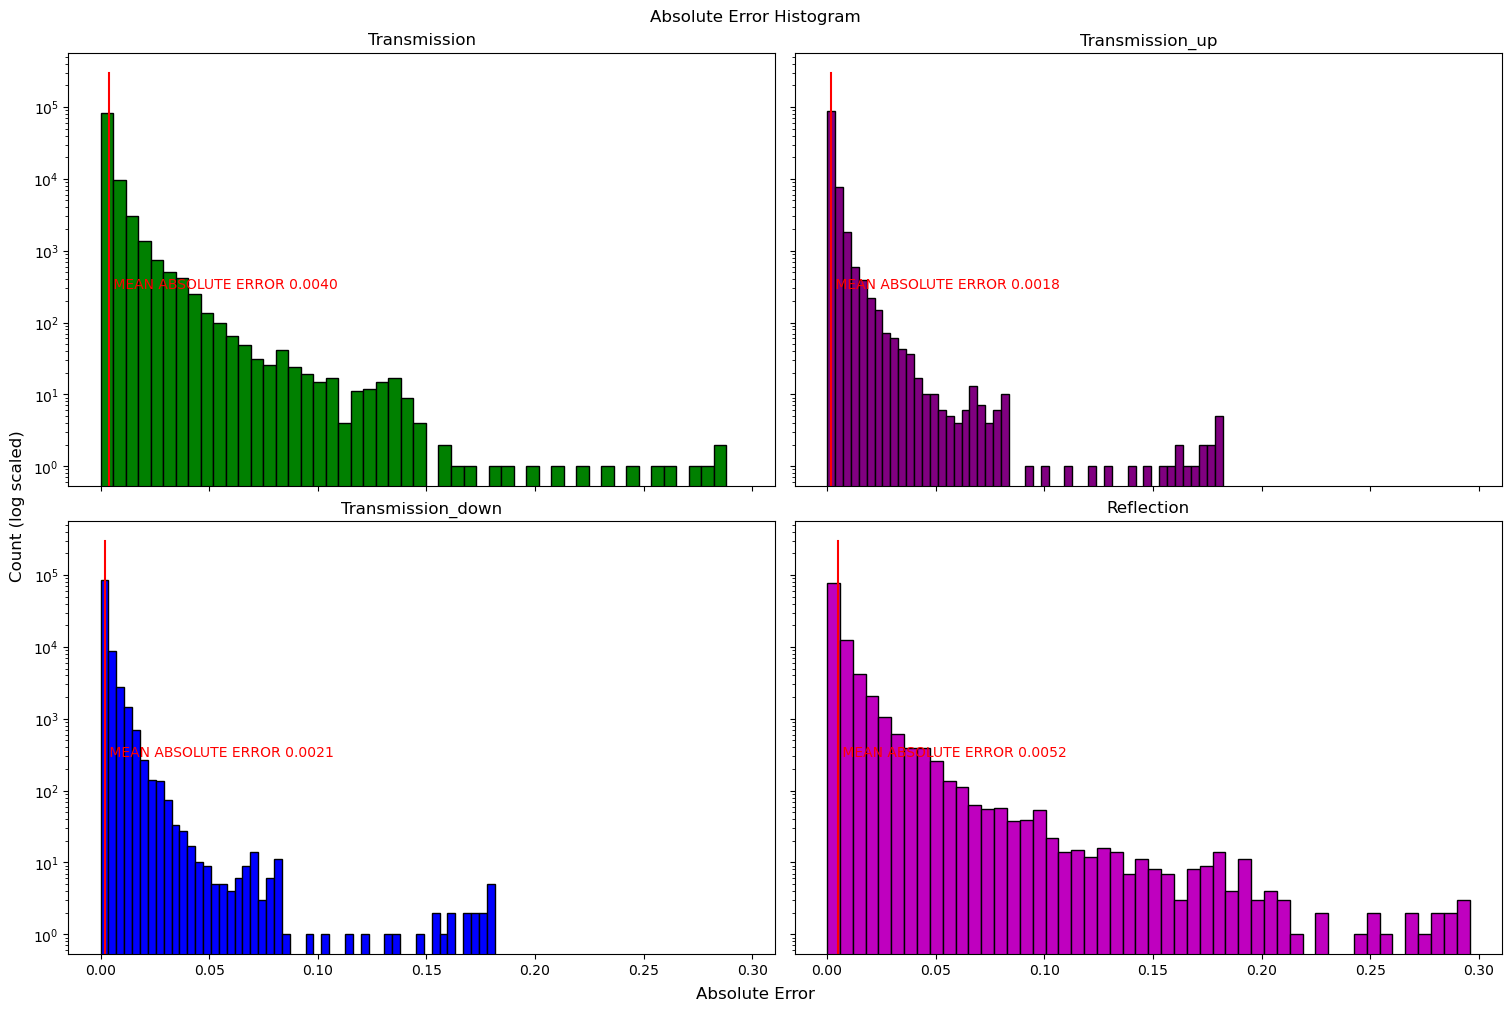

In [23]:
true_values = np.array(test_labels)

print(true_values.shape)

abs_difference = np.abs(model_prediction_test_data - true_values)
print(abs_difference.shape)

# abs_difference = np.divide(np.abs(guesses - true_values), true_values)*100
# print(abs_difference.shape)

ax_names = [[Names_of_labels[0], Names_of_labels[1]], [Names_of_labels[2], Names_of_labels[3]]]

fig, axd = plt.subplot_mosaic(ax_names, layout='constrained', sharey=True, sharex=True)
fig.set_figwidth(15)
fig.set_figheight(10)
fig.suptitle('Absolute Error Histogram')
fig.supylabel('Count (log scaled)')
fig.supxlabel('Absolute Error')

for i, (colour, label) in enumerate(zip(['g', 'purple', 'blue', 'm'], Names_of_labels)):
    average_error = np.mean(abs_difference[:,i])

    if label == "Reflection":
        outlier_loc = np.argmax(abs_difference[:,i])
        abs_difference = np.concatenate((abs_difference[:outlier_loc], abs_difference[outlier_loc+1:]))

    n, bins, patches = axd[label].hist(abs_difference[:,i], color=colour, bins=50, density=False, cumulative=False, edgecolor='black')
    axd[label].set_yscale('log')
    axd[label].set_title(f'{label}')
    axd[label].plot(np.ones(10)*average_error, np.linspace(0, 3e5, 10), c='r')
    axd[label].text(average_error, 3e2, f' MEAN ABSOLUTE ERROR {average_error:.4f}', c='r')
    # axd[label].set_ylabel('Count (log scaled)')
    # axd[label].set_xlabel('Absolute Percent Error')
    # for percentile_to_highlight in [0.99, 0.999, 0.9999]:
    #     loc_of_xpercentile = bins[1:][n > percentile_to_highlight][0]
    #     axd[label].plot(np.ones(50)*loc_of_xpercentile, np.linspace(0, 1.05, 50), c='r')
    #     axd[label].text(loc_of_xpercentile, 1.05, f'{percentile_to_highlight*100}%', c='r', rotation=20)
    #     axd[label].text(loc_of_xpercentile, 0.4, f'{loc_of_xpercentile:.4f}', c='r', rotation=-90)
    

(99000, 4)
(99000, 4)


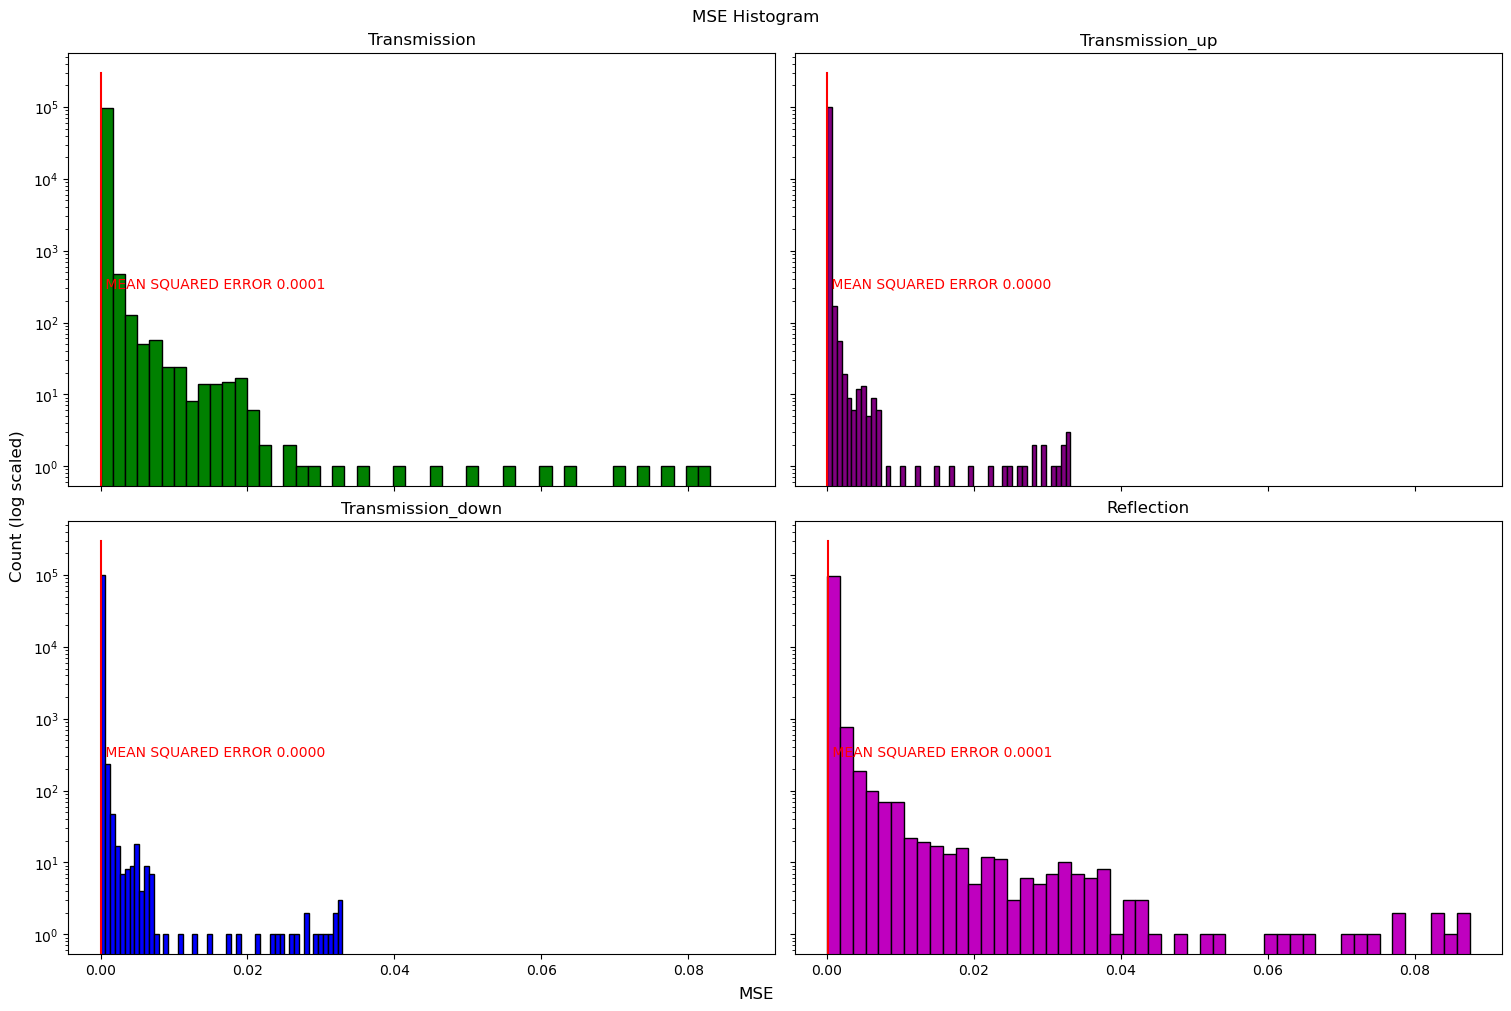

In [24]:
true_values = np.array(test_labels)

print(true_values.shape)
print(model_prediction_test_data.shape)


squared_diff = np.square(true_values - model_prediction_test_data)

# Calculate the mean of squared differences
#MSE = np.mean(squared_diff)

# abs_difference = np.divide(np.abs(guesses - true_values), true_values)*100
# print(abs_difference.shape)

ax_names = [[Names_of_labels[0], Names_of_labels[1]], [Names_of_labels[2], Names_of_labels[3]]]

fig, axd = plt.subplot_mosaic(ax_names, layout='constrained', sharey=True, sharex=True)
fig.set_figwidth(15)
fig.set_figheight(10)
fig.suptitle('MSE Histogram')
fig.supylabel('Count (log scaled)')
fig.supxlabel('MSE')

for i, (colour, label) in enumerate(zip(['g', 'purple', 'blue', 'm'], Names_of_labels)):
    average_error = np.mean(squared_diff[:,i])

    if label == "Reflection":
        outlier_loc = np.argmax(squared_diff[:,i])
        squared_diff = np.concatenate((squared_diff[:outlier_loc], squared_diff[outlier_loc+1:]))

    n, bins, patches = axd[label].hist(squared_diff[:,i], color=colour, bins=50, density=False, cumulative=False, edgecolor='black')
    axd[label].set_yscale('log')
    axd[label].set_title(f'{label}')
    axd[label].plot(np.ones(10)*average_error, np.linspace(0, 3e5, 10), c='r')
    axd[label].text(average_error, 3e2, f' MEAN SQUARED ERROR {average_error:.4f}', c='r')
    # axd[label].set_ylabel('Count (log scaled)')
    # axd[label].set_xlabel('Absolute Percent Error')
    # for percentile_to_highlight in [0.99, 0.999, 0.9999]:
    #     loc_of_xpercentile = bins[1:][n > percentile_to_highlight][0]
    #     axd[label].plot(np.ones(50)*loc_of_xpercentile, np.linspace(0, 1.05, 50), c='r')
    #     axd[label].text(loc_of_xpercentile, 1.05, f'{percentile_to_highlight*100}%', c='r', rotation=20)
    #     axd[label].text(loc_of_xpercentile, 0.4, f'{loc_of_xpercentile:.4f}', c='r', rotation=-90)

(99000, 4)
(99000, 4)
(99000, 4)
(99000, 4)
(99000, 4)


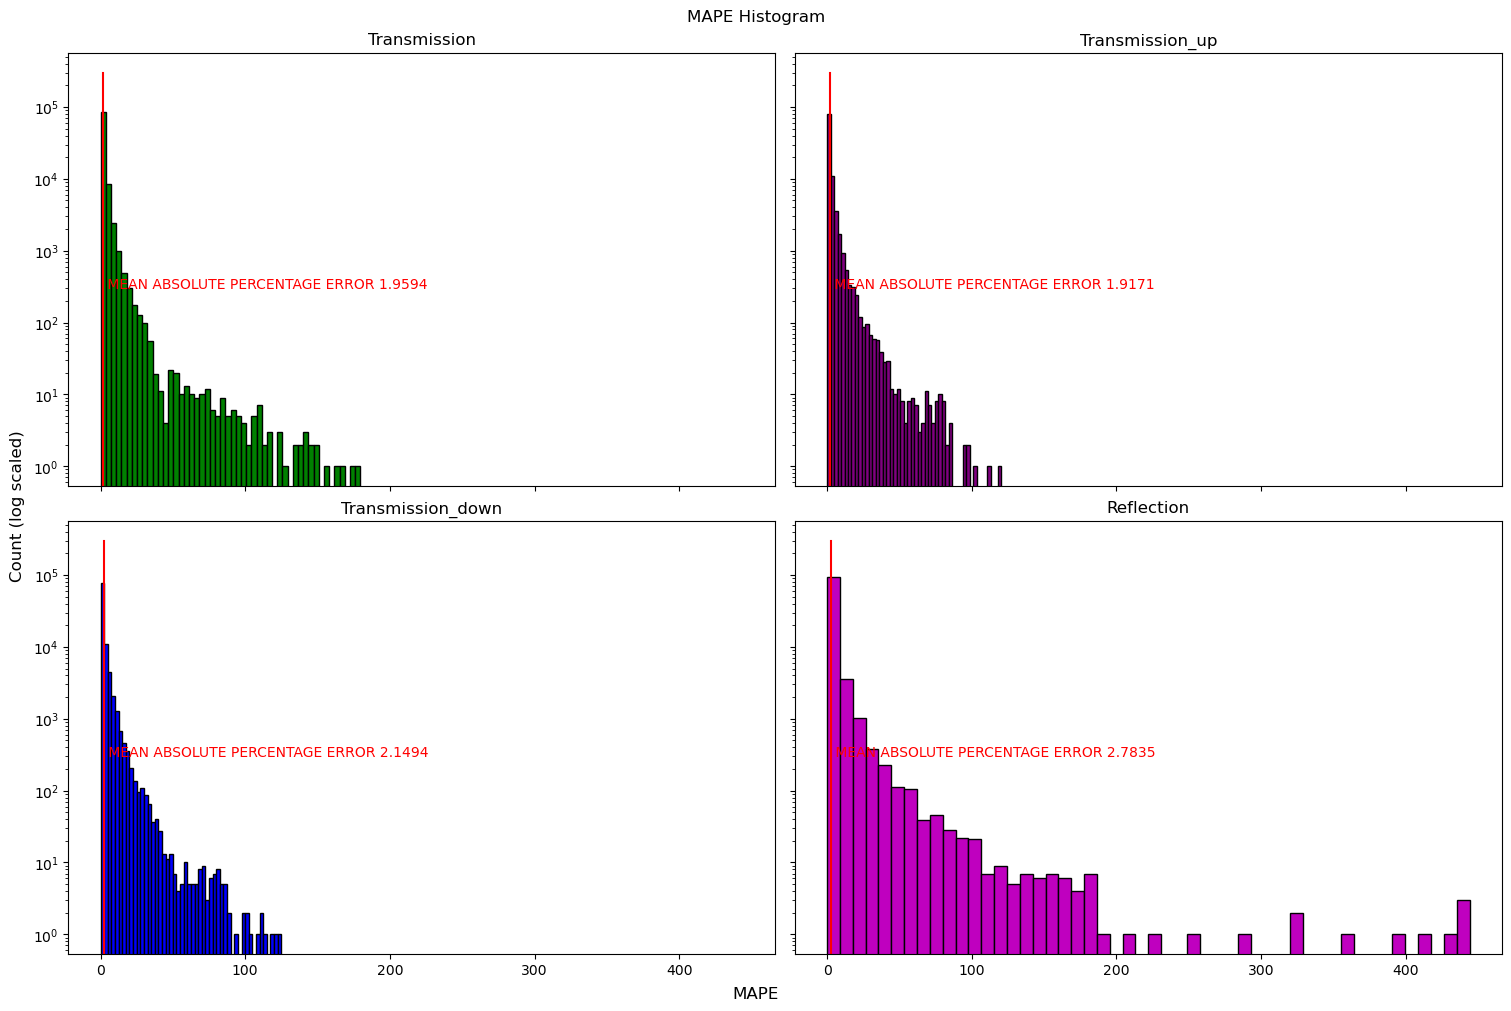

In [25]:

true_values = np.array(test_labels)

print(true_values.shape)
print(model_prediction_test_data.shape)


# Calculate the absolute percentage differences
absolute_percentage_diff = np.abs((true_values - model_prediction_test_data) / true_values)

print(absolute_percentage_diff.shape)
# Calculate the mean of absolute percentage differences
absolute_percentage_diff = absolute_percentage_diff * 100

print(absolute_percentage_diff.shape)




# squared_diff = np.square(true_values - model_prediction_test_data)

# Calculate the mean of squared differences
#MSE = np.mean(squared_diff)

# abs_difference = np.divide(np.abs(guesses - true_values), true_values)*100
print(absolute_percentage_diff.shape)

ax_names = [[Names_of_labels[0], Names_of_labels[1]], [Names_of_labels[2], Names_of_labels[3]]]

fig, axd = plt.subplot_mosaic(ax_names, layout='constrained', sharey=True, sharex=True)
fig.set_figwidth(15)
fig.set_figheight(10)
fig.suptitle('MAPE Histogram')
fig.supylabel('Count (log scaled)')
fig.supxlabel('MAPE')

for i, (colour, label) in enumerate(zip(['g', 'purple', 'blue', 'm'], Names_of_labels)):
    average_error = np.mean(absolute_percentage_diff[:,i])

    if label == "Reflection":
        outlier_loc = np.argmax(absolute_percentage_diff[:,i])
        absolute_percentage_diff = np.concatenate((absolute_percentage_diff[:outlier_loc], absolute_percentage_diff[outlier_loc+1:]))

    n, bins, patches = axd[label].hist(absolute_percentage_diff[:,i], color=colour, bins=50, density=False, cumulative=False, edgecolor='black')
    axd[label].set_yscale('log')
    axd[label].set_title(f'{label}')
    axd[label].plot(np.ones(10)*average_error, np.linspace(0, 3e5, 10), c='r')
    axd[label].text(average_error, 3e2, f' MEAN ABSOLUTE PERCENTAGE ERROR {average_error:.4f}', c='r')
    # axd[label].set_ylabel('Count (log scaled)')
    # axd[label].set_xlabel('Absolute Percent Error')
    # for percentile_to_highlight in [0.99, 0.999, 0.9999]:
    #     loc_of_xpercentile = bins[1:][n > percentile_to_highlight][0]
    #     axd[label].plot(np.ones(50)*loc_of_xpercentile, np.linspace(0, 1.05, 50), c='r')
    #     axd[label].text(loc_of_xpercentile, 1.05, f'{percentile_to_highlight*100}%', c='r', rotation=20)
    #     axd[label].text(loc_of_xpercentile, 0.4, f'{loc_of_xpercentile:.4f}', c='r', rotation=-90)

440000
Training features: (396000, 6), labels (396000, 4) 
Testing Features (66000, 6), labels = (66000, 4)
4/4 [==============================] - 0s 63ms/step
[5.81007000e-08 2.87299000e-07 8.03242000e-08 1.76188000e-07
 1.70182000e+00 1.46615599e-06]
[0.3120318 0.2160083 0.2157497 0.2560985]


ValueError: operands could not be broadcast together with shapes (15,) (100,) (15,) 

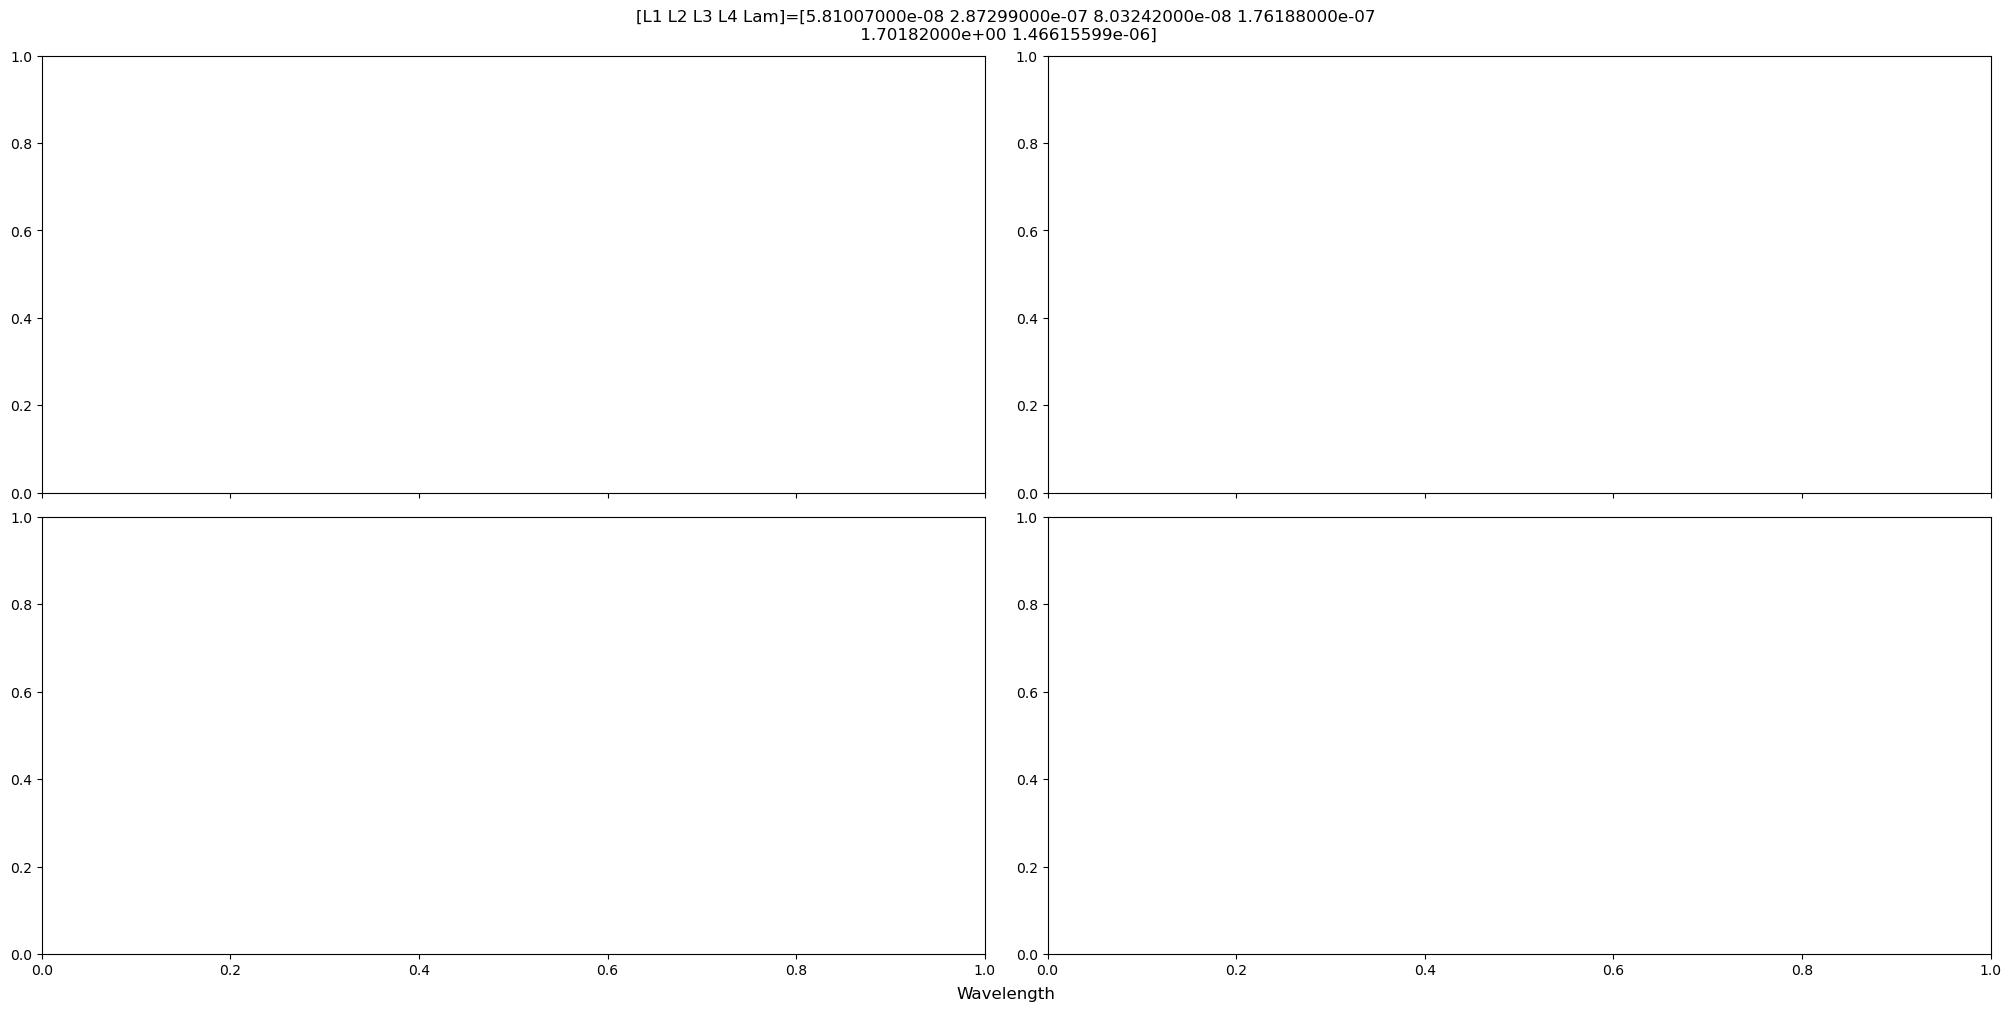

In [26]:
testing_data_file_paths = [
    "random_samples_8.dat",
    "random_samples_9.dat",
    "test_data.dat"]

wavelengths = np.loadtxt("wavelengths.dat", delimiter=',')

def seperate_out_by_wavelength(linked_data):
    for_output_features = []
    for_output_labels = []
    for data in linked_data:
        for tlabel, tuplabel, tdownlabel, rlabel, wavelength in zip(data[0], data[1], data[2], data[3], wavelengths):
            feature = [*data[4], wavelength]
            for_output_features.append(feature)
            for_output_labels.append([tlabel, tuplabel, tdownlabel, rlabel])
    return (np.array(for_output_features), np.array(for_output_labels))

def load_data_into_arrays(file_paths, shuffle=False):
    #Link labels and features to shuffle, avoiding having same geometric parameters in training and testing data
    temp_combined = []

    for file_path in file_paths:
        file = np.loadtxt(file_path)
        T_matrix = file[:,0:100]
        Tup_matrix = file[:,100:200]
        Tdown_matrix = np.abs(file[:,200:300])
        R_matrix = np.abs(file[:,300:400])

        raw_features = np.array(file[:,400:410]) #missing wavelength still
        # [L1 L2 L3 L4 Lam Nswg _ SiLength Pmode]
        raw_features = np.delete(raw_features, 7, 1) #removing Si_Length
        raw_features = np.delete(raw_features, 6, 1) #removing Center Height
        raw_features = np.delete(raw_features, 4, 1) #removing Lam

        for t_row, tup_row, tdown_row, r_row, temp_feature in zip(T_matrix, Tup_matrix, Tdown_matrix, R_matrix, raw_features):
            if temp_feature[-1] == TM_MODE:
                temp_combined.append([t_row, tup_row, tdown_row, r_row, temp_feature[0:-1]]) #combine removing pmode as a feature
    temp_combined = np.array(temp_combined, dtype=object)
    
    if shuffle:
        np.random.shuffle(temp_combined)

    return seperate_out_by_wavelength(temp_combined)




test_features, test_labels = load_data_into_arrays(testing_data_file_paths)




print(test_labels.shape[0])

# for testing
labl1 = [] 
ft1 = []
for kk1 in range(int(test_labels.shape[0]/100)):
    labl1.append(test_labels[kk1*100+70:kk1*100+100])
    ft1.append(test_features[kk1*100+70:kk1*100+100])
    
    #print(test_labels[kk*100+70:kk*100+100])
#test_features = test_features[70:99]

labl1 = np.array(labl1[::2])
labl1 = labl1.reshape(-1, labl1.shape[-1])

ft1 = np.array(ft1[::2])
ft1 = ft1.reshape(-1, ft1.shape[-1])
test_labels = labl1
test_features = ft1


#print(test_features.shape)
#test_labels
#print(wavelengths[70])
#print(test_labels)

wavelengths = wavelengths[70:100]
wavelengths = wavelengths[::2]


print(f"Training features: {train_features.shape}, labels {train_labels.shape} \nTesting Features {test_features.shape}, labels = {test_labels.shape}")




test_data = tf.data.Dataset.from_tensor_slices((test_features, test_labels))





#configure batches
batch_size = 512
test_data = test_data.batch(batch_size, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.prefetch(batch_size)

def plot_geo_parameter(offset):
    guesses_all = modelv1.predict(test_features[(offset*100+0):(offset*100+100)])
    true_values_all = test_labels[(offset*100+0):(offset*100+100)]

    print(test_features[(offset*100+0):(offset*100+100)][0])
    print(test_labels[(offset*100+0):(offset*100+100)][46])

    total_guess = np.sum(guesses_all, axis=1)
    total_true = np.sum(true_values_all, axis=1)

    #ax_names = [['sum', Names_of_labels[0], Names_of_labels[1]], ["error", Names_of_labels[2], Names_of_labels[3]]]
    ax_names = [[Names_of_labels[0], Names_of_labels[1]], [Names_of_labels[2], Names_of_labels[3]]]
  
    

    fig, axd = plt.subplot_mosaic(ax_names, layout='constrained', sharex=True)
    fig.suptitle('[L1 L2 L3 L4 Lam]='f'{test_features[(offset*100+0):(offset*100+100)][0]}')
    fig.supxlabel('Wavelength')
    fig.set_figwidth(20)
    fig.set_figheight(10)

    # plt.grid(True)

    #fig.suptitle(f'Geometric Parameter set {offset}')

    #axd['sum'].plot(wavelengths, total_true, label='Lumerical')
    #axd['sum'].plot(wavelengths, total_guess, label='Machine Learning')
    # axd['sum'].set_title('Total Sum')
    # axd['sum'].set_ylabel('Sum')
    # axd['sum'].legend()

    average_total_error = np.zeros(wavelengths.shape)

    for i, label in enumerate(Names_of_labels):
        guesses = guesses_all[:, i]
        true_values = true_values_all[:, i]

        abs_difference = np.abs(guesses - true_values)
        # abs_difference = np.divide(np.abs(guesses - true_values), true_values)*100
        average_total_error += abs_difference

        # print(np.mean(abs_difference))

        axd[label].plot(wavelengths, true_values, label="Lumerical")
        axd[label].plot(wavelengths, guesses, label='Machine Learning')

        #ax2 = axd[label].twinx()

        #ax2.plot(wavelengths, abs_difference, label="Abs Error", color='red')

        # axd[label].set_xlabel('Wavelength')
        axd[label].set_ylabel(label)
        #ax2.set_ylabel('Abs Error', color='red')
        #ax2.tick_params(axis='y', labelcolor='red')

        #axd[label].set_title(f'{label}')
        #axd[label].legend()
    plt.savefig(f'Saving/for_conference_{offset}.png')

    # average_total_error = np.divide(average_total_error, 4)
    # print(average_total_error.shape)
    # axd['error'].plot(wavelengths, average_total_error, color='red')
    # axd['error'].set_title('Average Error')
    # axd['error'].set_ylabel('Average Abs Error', color='red')
    # axd['error'].tick_params(axis='y', belcolor='red')

for v in [20]:#,2045]:#[657, 2059, 3753, 1839, 1613]:300
    plot_geo_parameter(v)

print(wavelengths[0])

In [ ]:
# all_guesses = model.predict(test_data)
plt.figure(figsize=(10, 10))
idx = 3
jdx = 4
New_Names = [Names_of_labels[0],Names_of_labels[1], Names_of_labels[3]]
print(Names_of_labels[idx:jdx])
for i, label in enumerate(Names_of_labels[idx:jdx]): 
    if i != 2:
        error_by_wavelength = []
        guesses = model_prediction_test_data[:, i+idx]
        print(len(guesses[::100]))
        #print(guesses[1::10])
        true_values = test_labels[:, i+idx]
        abs_difference = (np.abs(guesses - true_values)/true_values)*100
        #abs_difference = np.divide(np.abs(guesses[0:100] - true_values[0:100]), true_values[0:100])*100
        #abs_difference = np.abs(guesses - true_values)

        #for jk in range(len(guesses)):
        for k, wavelength in enumerate(wavelengths):
            selection = abs_difference[k::100] #[k+100]#
            #print(i)
            #print(len(selection))
            #print(np.mean(selection))
            error_by_wavelength.append(np.mean(selection))

        #plt.plot(wavelengths*1e9, error_by_wavelength, label=label)
        #print(guesses[0]
        a = []
        #for j, wav in enumerate(guesses[::100])
        
        for j in range(len(guesses[::100])):
            for w in wavelengths:
                a.append(w*1e9)
        

        #plt.plot(wavelengths, guesses[100:200], label=label)
        #plt.plot(wavelengths, true_values[100:200], label=label)
        #np.savetxt('test.dat',(guesses, true_values))
        plt.scatter(true_values, guesses, s=1, c=a, cmap='jet')
        plt.colorbar().ax.tick_params(labelsize=18) 
        print(guesses[::100])
        #print(a[::100])
        #plt.xlabel('Actual Up')
        #plt.ylabel('Actual Down')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylabel('Predicted Reflection', fontsize=28)
        plt.xlabel('Actual Reflection', fontsize=28)
        #plt.title('Average Absolute Error by Wavelength')
        #plt.xlabel('Wavelength [nm]', fontsize=28)
        #plt.ylabel('Average Percent Error', fontsize=28)
#plt.legend(prop={'size': 18})
#print(len(wavelengths))
#plt.savefig(f'/home/nanophotonics/Research/Project_3swg/SWG-main/2D_Model/Graphs/for_conference_reflection.png')

In [ ]:

print("Optimizer:", modelv1.optimizer)
print("Loss function:", modelv1.loss)
print("Learning rate:", modelv1.optimizer.lr.numpy())  # If using a learning rate scheduler

In [ ]:
modelv1.summary()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt



# Retrieve the training history
v1 = modelv1.history.history
print(v1)

# Ensure that 'mae' is present in the history dictionary
# if 'mean_absolute_error' not in history:
#     raise ValueError("MAE loss data not found in the model's history.")

# Extract the MAE loss values
mae_losses = v1[metrics]

# Create the plot
epochs = list(range(1, len(mae_losses) + 1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae_losses, marker='o', linestyle='-', color='b')
plt.title('Number of Epochs vs MAE Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Absolute Error (MAE) Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()

In [ ]:
import h5py
import matplotlib.pyplot as plt

with h5py.File('Saving_Cloud20230810-190724_doubledkite_manyextralayers_leaky_adam_learningdecay_batch512_seed5678.h5py', 'r') as hf:
    mae_losses = hf['history']['mae'][:]

# Create the plot
epochs = list(range(1, len(mae_losses) + 1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae_losses, marker='o', linestyle='-', color='b')
plt.title('Number of Epochs vs MAE Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Absolute Error (MAE) Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt



# Retrieve the training history
history = modelv1.history.history
print(history)

# Ensure that 'mae' is present in the history dictionary
# if 'mean_absolute_error' not in history:
#     raise ValueError("MAE loss data not found in the model's history.")

# Extract the MAE loss values
mae_losses = history[keras.losses.MeanSquaredError()]

# Create the plot
epochs = list(range(1, len(mae_losses) + 1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae_losses, marker='o', linestyle='-', color='b')
plt.title('Number of Epochs vs MAE Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Absolute Error (MAE) Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()

In [ ]:
import os
hdf5_path = os.path.abspath('C:/Users/smitp/OneDrive/Desktop/epvs0.h5py')
with h5py.File(hdf5_path, 'r') as hf:
    mae_losses = hf['history']['mae'][:]